# PUF Counties Aggregate - Regression - HTE Cost

DeSYNPuf Counties Aggregate with Elixhauser Sums per User & RWJF Factor Rankings Dataset

Performed on the 975 Counties Identified by the Risk Adjustment Model, after Factor Analysis and minimal outlier removal

In [6]:
%matplotlib inline
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing as pre
import statsmodels.api as sm

In [7]:
medicare_counties = pd.read_csv("/home/kylier/python/DS/data/PUF/HIGHER_THAN_PREDICTED_FACTORS.csv")
medicare_counties.shape


(975, 80)

In [8]:
medicare_counties.drop(columns=medicare_counties.columns[0], axis=1, inplace=True, errors="ignore")

In [9]:
medicare_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS_STATE_CODE             975 non-null    int64  
 1   FIPS_COUNTY_CODE            975 non-null    int64  
 2   CNTY_BENE_CT                975 non-null    int64  
 3   CNTY_BENE_USRS              975 non-null    int64  
 4   CNTY_MEAN_AGE               975 non-null    float64
 5   CNTY_SEX_PROP               975 non-null    float64
 6   TOT_CNCR_CASES              975 non-null    int64  
 7   TOT_STRKETIA_CASES          975 non-null    int64  
 8   TOT_ESRD_CASES              975 non-null    int64  
 9   CNTY_TOT_VSTS               975 non-null    int64  
 10  CNTY_TOT_IP_VSTS            975 non-null    int64  
 11  CNTY_TOT_OP_VSTS            975 non-null    int64  
 12  CNTY_TOT_CODES              975 non-null    float64
 13  CNTY_TOT_PROCS              975 non

## Gamma Regression

The purpose of this notebook is attempt to perform GLM / Gamma / Log link regression against the COST variable using the variables defined by Factor Analysis, and then with the Factors created to see how they predict cost.

I am adding the variables HF_PROP_RANK, HO_PROP_RANK to the initial model, to see how they fare.

NOTE: The statsmodel API documentation recommends adding a constant to the X variables prior to modeling.

In [32]:
X = medicare_counties[["CNTY_USR_PROP", "TOT_ESRD_PREV", "TOT_CVRG_MOS_PB_PY", "TOT_RXCVRG_MOS_PB_PY",
                        "TOT_IP_VSTS_PU", "TOT_OP_VSTS_PU", "CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                        "TOT_IPDAYS_PU", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", 
                        "HO_PROP_RANK", "HF_PROP_RANK", "DIVERSE_PROP"]]

Y = medicare_counties[["TOT_COST_PB"]]
X

,CNTY_USR_PROP,TOT_ESRD_PREV,TOT_CVRG_MOS_PB_PY,TOT_RXCVRG_MOS_PB_PY,TOT_IP_VSTS_PU,TOT_OP_VSTS_PU,CODES_PU,PROCS_PU,PRVDRS_PU,TOT_IPDAYS_PU,TOT_CC_PREV,TOT_CC_INCD,TOT_ELIX_PU,HO_PROP_RANK,HF_PROP_RANK,DIVERSE_PROP
0,0.500000,0.500000,12.000000,11.500000,1.000000,20.000000,20.666667,25.666667,2.000000,8.000000,2.500000,0.500000,0.766667,0.714,0.804,0.000000
1,1.000000,0.000000,12.000000,12.000000,0.000000,38.000000,28.333333,39.333333,6.000000,0.000000,4.000000,1.000000,1.088889,0.102,0.707,1.000000
2,1.000000,0.000000,12.000000,12.000000,0.000000,33.000000,32.666667,59.000000,5.333333,0.000000,8.000000,4.000000,1.304040,0.768,0.848,0.000000
3,0.200000,0.200000,8.000000,4.466667,1.000000,21.000000,18.666667,25.000000,3.000000,16.000000,0.800000,0.600000,0.270833,0.263,0.232,0.200000
4,1.000000,0.000000,12.000000,4.000000,1.000000,0.000000,3.333333,0.000000,0.333333,14.000000,2.000000,1.000000,2.000000,0.797,0.766,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,0.787356,0.201149,11.336207,8.984674,0.788321,9.583942,11.001217,12.566910,1.945255,4.394161,4.005747,1.752874,1.498816,0.731,0.851,0.103448
971,0.773481,0.182320,11.314917,8.651934,0.707143,8.707143,9.694048,11.407143,2.165476,4.792857,4.049724,1.635359,1.475944,0.905,0.979,0.116022
972,0.833333,0.205556,11.170370,8.454630,0.913333,8.153333,10.054444,9.552222,2.618889,5.413333,4.316667,1.961111,1.625651,0.087,0.000,0.088889
973,0.867816,0.281609,11.494253,9.181992,0.814570,10.192053,12.008830,13.917219,2.222958,5.390728,5.166667,2.425287,1.676644,0.878,0.050,0.235632


In [33]:
Y

,TOT_COST_PB
0,127270.000000
1,90730.000000
2,137180.000000
3,28677.600000
4,53900.000000
...,...
970,65907.068966
971,61705.049724
972,67738.400000
973,86220.344828


In [34]:
X = sm.add_constant(X, prepend=False)

In [35]:
glm_gamma = sm.GLM(Y, X, family=sm.families.Gamma(sm.families.links.log()))
glm_results = glm_gamma.fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            TOT_COST_PB   No. Observations:                  975
Model:                            GLM   Df Residuals:                      958
Model Family:                   Gamma   Df Model:                           16
Link Function:                    log   Scale:                        0.076754
Method:                          IRLS   Log-Likelihood:                -11093.
Date:                Sat, 12 Jun 2021   Deviance:                       64.099
Time:                        16:15:50   Pearson chi2:                     73.5
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
CNTY_USR_PROP            0.9000      0.114      7.897      0.000       0.677       1.123
TOT_ESRD_PREV            0.1246      0.086      1.441      0.150      -0.045       0.294
TOT_CVRG_MOS_PB_PY      -0.0195      0.015     -1.294      0.196      -0.049       0.010
TOT_RXCVRG_MOS_PB_PY     0.0093      0.007      1.267      0.205      -0.005       0.024
TOT_IP_VSTS_PU           0.1563      0.049      3.204      0.001       0.061       0.252
TOT_OP_VSTS_PU          -0.0354      0.009     -4.035      0.000      -0.053      -0.018
CODES_PU                 0.0489      0.012      4.235      0.000       0.026       0.072
PROCS_PU                 0.0188      0.004      4.438      0.000       0.011       0.027
PRVDRS_PU               -0.0274      0.015     -1.796      0.073      -0.057       0.003
TOT_IPDAYS_PU            0.0090      0.004      2.304      0.021       0.001       0.017
TOT_CC_PREV              0.0537      0.019      2.816      0.005       0.016       0.091
TOT_CC_INCD              0.0173      0.021      0.833      0.405      -0.023       0.058
TOT_ELIX_PU              0.0329      0.025      1.317      0.188      -0.016       0.082
HO_PROP_RANK             0.0845      0.044      1.915      0.055      -0.002       0.171
HF_PROP_RANK            -0.0056      0.044     -0.127      0.899      -0.092       0.081
DIVERSE_PROP             0.1496      0.065      2.294      0.022       0.022       0.277
const                    9.7741      0.144     67.690      0.000       9.491      10.057
========================================================================================
"""

## Coefficients and p-values

### Significant Effects: 

#### USR_PROP: Has a 90% positive impact on cost (makes sense - no utilization, no cost)
#### IP_VSTS_PU: Each additional visit adds 15.6% (steep)
#### OP_VSTS_PU: Has a negative impact!  For every additional OP visit, cost decreases by 3.5% (yay for primary care)
#### CODES_PU: Each additional code contributes nearly 5% (it adds up)
#### PROCS_PU: Each additional procedure contributes 2% (some are minor)
#### PRVDRS_PU: Each additional provider decreases cost by almost 3%  (at 90% CI)
#### IPDAYS_PU: Each additional IPDAY per user increases cost by almost 1% (wow, when you think about it, that's a lot)
#### CC_PREV: Each additional chronic condition contributes 5.3%
#### HO_PROP_RANK: Moving towards 1 increases cost by 8.4% (at 90% CI) - this is cost of living longer
#### DIVERSE_PROP: The more persons in a county identify as not white, the more cost by 15%

Why is the contributor HO_PROP_RANK and not HF_PROP_RANK?  The Health Factors staff answered this in a recent webinar, telling users of the rankings to think of HO_PROP_RANK as "Today's Health" of your county, and HF_PROP_RANK as "Tomorrow's Health".  They also pointed out that if your county has ok HO rank but poor HF rank and nothing is done, likely future HO ranks will be lower.  I think this makes sense, that there is a relationship between additional years of life and quality years of life, and cost.

In [36]:
from statsmodels.genmod.families import family, links

glm_results.bse

CNTY_USR_PROP           0.113971
TOT_ESRD_PREV           0.086441
TOT_CVRG_MOS_PB_PY      0.015065
TOT_RXCVRG_MOS_PB_PY    0.007306
TOT_IP_VSTS_PU          0.048786
TOT_OP_VSTS_PU          0.008778
CODES_PU                0.011555
PROCS_PU                0.004241
PRVDRS_PU               0.015256
TOT_IPDAYS_PU           0.003925
TOT_CC_PREV             0.019079
TOT_CC_INCD             0.020774
TOT_ELIX_PU             0.025008
HO_PROP_RANK            0.044104
HF_PROP_RANK            0.044194
DIVERSE_PROP            0.065229
const                   0.144396
dtype: float64

In [37]:
glm_results.scale

0.076754148824584

In a Gamma GLM, the variance is proportional to the square of the mean (the constant of proportionality is the scale parameter). So under this model, the variance is around half of the squared mean. Here is a plot of the variance against the mean.

Text(0, 0.5, 'Variance')

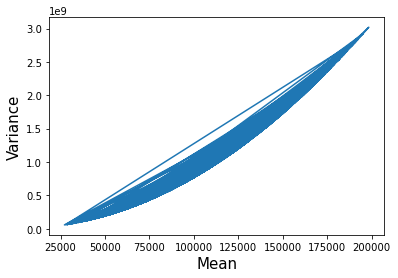

In [38]:
alpha = 1 / glm_results.scale
beta = Y * glm_results.scale

plt.plot(alpha*beta, alpha*beta**2, '-')
plt.xlabel("Mean", size=15)
plt.ylabel("Variance", size=15)

## Residuals vs. Expected

It isn't too bad.  We expect the heteroscedasticity and there are a couple of major outliers as well.

Text(0, 0.5, 'Residuals')

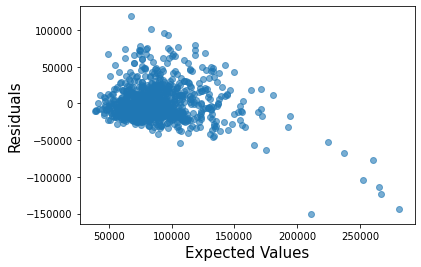

In [39]:
plt.plot(glm_results.fittedvalues, glm_results.resid_response, 'o', alpha=0.6)
plt.xlabel("Expected Values", size=15)
plt.ylabel("Residuals", size=15)

## An OLS aside (taken from a sample notebook on the GLM)

We can use a linear model to explore the relationship between conditional mean and conditional variance without fixing the relationship in the model. The plot of residuals on fitted values strongly suggests that the variance increases with the mean.

Text(0, 0.5, 'OLS Residuals')

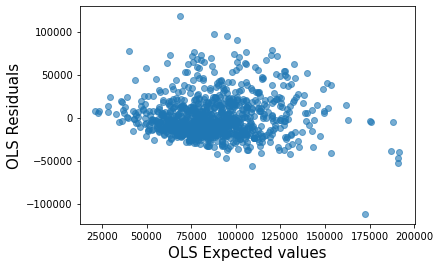

In [40]:
OLS_result = sm.OLS(Y, X).fit()

plt.plot(OLS_result.fittedvalues, OLS_result.resid, 'o', alpha=0.6)
plt.xlabel("OLS Expected values", size=15)
plt.ylabel("OLS Residuals", size=15)

We can directly estimate the conditional variance by smoothing the squared residuals against the expected mean. The relationship is roughly parabolic, although the vertex of the parabola appears slightly shifted to the right of the origin. The points with negative expected value means can be ignored.

## Interesting!

Text(0, 0.5, 'Squared residual')

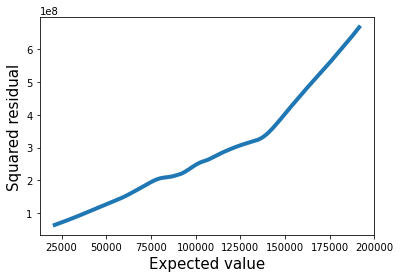

In [41]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fit = lowess(OLS_result.resid**2, OLS_result.fittedvalues)

plt.plot(fit[:, 0], fit[:, 1], '-', lw=4)
plt.xlabel("Expected value", size=15)
plt.ylabel("Squared residual", size=15)

## More Model Review


In [42]:
glm_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Generalized linear model
====================================================================
Model:                 GLM               AIC:             22220.2402
Link Function:         log               BIC:             -6529.2766
Dependent Variable:    TOT_COST_PB       Log-Likelihood:  -11093.   
Date:                  2021-06-12 16:27  LL-Null:         -11565.   
No. Observations:      975               Deviance:        64.099    
Df Model:              16                Pearson chi2:    73.5      
Df Residuals:          958               Scale:           0.076754  
Method:                IRLS                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
CNTY_USR_PROP         0.9000   0.1140  7.8968 0.0000  0.6766  1.1234
TOT_ESRD_PREV         0.1246   0.0864  1.4411 0.1496 -0.0448  0.2940
TOT_CVRG_MOS_PB_PY   -0.0195   0.0151 -1.2944 0.1955 -0.0490  0.0100
TOT_RXCVRG_MOS_PB_PY  0.0093   0.0073  1.2672 0.2051 -0.0051  0.0236
TOT_IP_VSTS_PU        0.1563   0.0488  3.2039 0.0014  0.0607  0.2519
TOT_OP_VSTS_PU       -0.0354   0.0088 -4.0353 0.0001 -0.0526 -0.0182
CODES_PU              0.0489   0.0116  4.2353 0.0000  0.0263  0.0716
PROCS_PU              0.0188   0.0042  4.4379 0.0000  0.0105  0.0271
PRVDRS_PU            -0.0274   0.0153 -1.7956 0.0726 -0.0573  0.0025
TOT_IPDAYS_PU         0.0090   0.0039  2.3040 0.0212  0.0014  0.0167
TOT_CC_PREV           0.0537   0.0191  2.8161 0.0049  0.0163  0.0911
TOT_CC_INCD           0.0173   0.0208  0.8328 0.4050 -0.0234  0.0580
TOT_ELIX_PU           0.0329   0.0250  1.3175 0.1877 -0.0161  0.0820
HO_PROP_RANK          0.0845   0.0441  1.9152 0.0555 -0.0020  0.1709
HF_PROP_RANK         -0.0056   0.0442 -0.1268 0.8991 -0.0922  0.0810
DIVERSE_PROP          0.1496   0.0652  2.2942 0.0218  0.0218  0.2775
const                 9.7741   0.1444 67.6897 0.0000  9.4911 10.0572
====================================================================

"""

### Pearson Chi-Squared

The discrepancy between observed and expected, a measure of "badness of fit".  Can vary between 0 (impossible) and infinity.

In [43]:
glm_results.pearson_chi2

73.5304745739533

## Predictions with Machine Learning

Below, I am going to see what kind of predictions I can make using a GLM model with scikit learn.

In [22]:
from sklearn.linear_model import GammaRegressor
from sklearn.model_selection import train_test_split

In [44]:
analysis_ds = medicare_counties[["CNTY_USR_PROP", "TOT_ESRD_PREV", "TOT_CVRG_MOS_PB_PY", "TOT_RXCVRG_MOS_PB_PY",
                        "TOT_IP_VSTS_PU", "TOT_OP_VSTS_PU", "CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                        "TOT_IPDAYS_PU", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", 
                        "HO_PROP_RANK", "HF_PROP_RANK", "DIVERSE_PROP", "TOT_COST_PB"]]

analysis_ds_copy = analysis_ds.copy()

train, test = train_test_split(analysis_ds, test_size=0.25, random_state=121)

train = pd.DataFrame(train, columns=["CNTY_USR_PROP", "TOT_ESRD_PREV", "TOT_CVRG_MOS_PB_PY", "TOT_RXCVRG_MOS_PB_PY",
                        "TOT_IP_VSTS_PU", "TOT_OP_VSTS_PU", "CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                        "TOT_IPDAYS_PU", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", 
                        "HO_PROP_RANK", "HF_PROP_RANK", "DIVERSE_PROP", "TOT_COST_PB"])

test = pd.DataFrame(test, columns=["CNTY_USR_PROP", "TOT_ESRD_PREV", "TOT_CVRG_MOS_PB_PY", "TOT_RXCVRG_MOS_PB_PY",
                        "TOT_IP_VSTS_PU", "TOT_OP_VSTS_PU", "CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                        "TOT_IPDAYS_PU", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", 
                        "HO_PROP_RANK", "HF_PROP_RANK", "DIVERSE_PROP", "TOT_COST_PB"])

train

,CNTY_USR_PROP,TOT_ESRD_PREV,TOT_CVRG_MOS_PB_PY,TOT_RXCVRG_MOS_PB_PY,TOT_IP_VSTS_PU,TOT_OP_VSTS_PU,CODES_PU,PROCS_PU,PRVDRS_PU,TOT_IPDAYS_PU,TOT_CC_PREV,TOT_CC_INCD,TOT_ELIX_PU,HO_PROP_RANK,HF_PROP_RANK,DIVERSE_PROP,TOT_COST_PB
949,0.762590,0.208633,11.031175,8.491607,0.820755,9.141509,10.946541,11.792453,2.738994,5.009434,4.568345,2.107914,1.882513,0.726,0.947,0.107914,73288.316547
755,0.846154,0.102564,11.256410,8.059829,0.575758,8.363636,9.222222,10.202020,1.171717,2.090909,3.948718,1.538462,1.467968,0.904,0.803,0.282051,68621.794872
127,0.800000,0.400000,10.400000,7.666667,0.750000,7.250000,10.083333,11.750000,1.083333,4.000000,5.000000,1.400000,1.270833,0.175,0.456,0.000000,78848.400000
913,0.840909,0.215909,11.674242,9.058712,0.932432,10.932432,13.112613,15.081081,1.481982,4.148649,5.215909,2.488636,1.441203,0.471,0.561,0.204545,91721.522727
136,0.833333,0.000000,12.000000,9.361111,0.800000,10.200000,10.766667,13.933333,1.833333,4.200000,3.000000,1.166667,1.445324,0.229,0.076,0.166667,47571.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.625000,0.125000,9.138889,7.458333,1.066667,9.533333,12.533333,12.755556,2.911111,6.133333,3.166667,1.791667,1.187553,0.376,0.294,0.041667,68401.166667
607,0.703704,0.111111,11.456790,8.061728,0.842105,8.894737,11.070175,12.719298,1.649123,3.263158,3.703704,1.407407,0.953840,0.513,0.872,0.037037,65788.666667
264,0.444444,0.222222,9.629630,7.148148,2.000000,11.125000,16.875000,13.791667,2.791667,8.750000,3.333333,1.444444,2.521792,0.267,0.267,0.222222,95815.333333
469,0.700000,0.300000,10.300000,8.316667,1.071429,9.428571,12.809524,12.238095,1.857143,6.857143,4.900000,2.900000,1.885697,0.976,0.918,0.000000,97146.700000


In [45]:
train_x = train[["CNTY_USR_PROP", "TOT_ESRD_PREV", "TOT_CVRG_MOS_PB_PY", "TOT_RXCVRG_MOS_PB_PY",
                        "TOT_IP_VSTS_PU", "TOT_OP_VSTS_PU", "CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                        "TOT_IPDAYS_PU", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", 
                        "HO_PROP_RANK", "HF_PROP_RANK", "DIVERSE_PROP"]]
train_y = train["TOT_COST_PB"]

test_x = test[["CNTY_USR_PROP", "TOT_ESRD_PREV", "TOT_CVRG_MOS_PB_PY", "TOT_RXCVRG_MOS_PB_PY",
                        "TOT_IP_VSTS_PU", "TOT_OP_VSTS_PU", "CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                        "TOT_IPDAYS_PU", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", 
                        "HO_PROP_RANK", "HF_PROP_RANK", "DIVERSE_PROP"]]
test_y = test["TOT_COST_PB"]

s = pre.StandardScaler()
train_x = s.fit_transform(train_x)
test_x = s.fit_transform(test_x)

gr = GammaRegressor()
gr.fit(train_x, train_y)

GammaRegressor()

In [46]:
predictions = gr.predict(test_x)

In [48]:
gr.score(train_x, train_y)

0.4540675645920049

In [49]:
from sklearn.metrics import mean_squared_error


print('Coefficients:', gr.coef_)
print('\n')

print('Mean squared error: %.2f'
      % mean_squared_error(test_y, predictions))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(test_y, predictions)))

Coefficients: [ 0.04328837  0.02752067  0.00858516  0.01205743  0.04061564  0.0082566
  0.03755767  0.03330129 -0.00108966  0.03499473  0.04732157  0.02853625
  0.02804165  0.00870254 -0.00153259  0.00806449]


Mean squared error: 523348375.66
Root mean squared error: 22876.81


## Holdout Performance

The RMSE is 22876.81, but the data set has very little outlier removal.


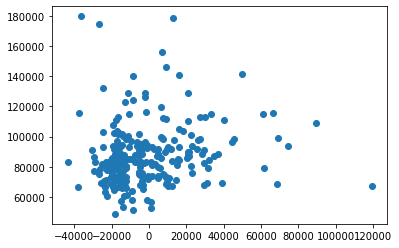

In [50]:
plt.scatter((test_y-predictions),predictions)

plt.show()

In [51]:
from sklearn.metrics import explained_variance_score

explained_variance_score(test_y, predictions)

0.5179036126153136